__Research Question 1__
* Is there a growth or decline of book genre?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!ls

Untitled.rtf                     glove.twitter.27B.200d.txt
books_interactions_final.json    readme.rtf
books_metadata_comics.json       rq1.ipynb
books_metadata_thriller.json     rq2.ipynb
books_review_comics_final.json   rq4.ipynb
books_review_thriller.json       rq5.ipynb
comic_review_classification.json rq6-regression.ipynb
glove.6B.100d.txt


__book metadata and book review datasets__

In [3]:
books_metadata = pd.read_json('books_metadata_comics.json')
books_review_comics = pd.read_json('books_review_comics_final.json')

# Comics and graphics analysis

In [4]:
books_metadata.head()

,text_reviews_count,language_code,popular_shelves,is_ebook,average_rating,description,authors,publication_year,book_id,ratings_count,work_id,title
2,5,eng,"[{'count': '493', 'name': 'to-read'}, {'count'...",false,4.28,The questions plaguing Captain America's dream...,"[{'author_id': '37450', 'role': ''}]",2012,13571772,51,102217,Captain America: Winter Soldier (The Ultimate ...
4,6,en-US,"[{'count': '20', 'name': 'to-read'}, {'count':...",false,4.06,These are the stories that catapulted Superman...,"[{'author_id': '81563', 'role': ''}, {'author_...",1997,707611,51,693886,"Superman Archives, Vol. 2"
6,9,eng,"[{'count': '47', 'name': 'to-read'}, {'count':...",false,4.15,PRODUCT DESCRIPTION: The first new volume of G...,"[{'author_id': '14965', 'role': ''}, {'author_...",2016,27036536,39,47077783,"War Stories, Volume 3"
11,26,eng,"[{'count': '104', 'name': 'to-read'}, {'count'...",false,3.16,Sir Arthur Conan Doyle's dauntless detective r...,"[{'author_id': '61231', 'role': ''}, {'author_...",2011,11827783,114,16782451,Sherlock Holmes: Year One
12,6,eng,"[{'count': '133', 'name': 'manga'}, {'count': ...",false,4.41,This is the story of a group of boys who try t...,"[{'author_id': '294649', 'role': ''}]",2012,12349665,149,3062163,"Naoki Urasawa's 20th Century Boys, Volume 20 (..."


__metadata__: used columns/features
* language_code
* average_rating
* book_id
* publication_year
* is_ebook

In [5]:
books_metadata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23937 entries, 2 to 89410
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   text_reviews_count  23937 non-null  int64  
 1   language_code       23937 non-null  object 
 2   popular_shelves     23937 non-null  object 
 3   is_ebook            23937 non-null  object 
 4   average_rating      23937 non-null  float64
 5   description         23937 non-null  object 
 6   authors             23937 non-null  object 
 7   publication_year    23937 non-null  int64  
 8   book_id             23937 non-null  int64  
 9   ratings_count       23937 non-null  int64  
 10  work_id             23937 non-null  int64  
 11  title               23937 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 2.4+ MB


__reivew__: used columns/features
* book_id
* rating
* review_text

In [6]:
books_review_comics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330052 entries, 0 to 330051
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   index         330052 non-null  int64 
 1   user_id       330052 non-null  object
 2   book_id       330052 non-null  int64 
 3   review_id     330052 non-null  object
 4   rating        330052 non-null  int64 
 5   review_text   330052 non-null  object
 6   date_added    330052 non-null  object
 7   date_updated  330052 non-null  object
 8   read_at       330052 non-null  object
 9   n_votes       330052 non-null  int64 
 10  n_comments    330052 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 30.2+ MB


__Get the unique publication year list__

In [7]:
books_metadata['publication_year'].unique()

array([2012, 1997, 2016, 2011, 2010, 2014, 2009, 2013, 1989, 2006, 2015,
       2017, 2007, 2002, 2008, 1990, 2005, 1991, 2004, 2003, 2018, 1986,
       1998, 1999, 1993, 1995, 2000, 1996, 2001, 1987, 1988, 1992, 1994])

__sort data by publication year__

In [8]:
rating_year = books_metadata[['average_rating','publication_year']].sort_values(by=['publication_year'])

In [9]:
rating_year.head()

,average_rating,publication_year
72703,2.83,1986
21558,4.04,1986
5353,4.23,1986
63729,4.25,1986
41738,4.16,1986


__Standard deviation of rating for each publication year__
* groupby publication year and calculate standard deviation for each publication year

In [10]:
std_rating_year = rating_year.groupby('publication_year').agg(np.std)

In [11]:
std_rating_year.head()

,average_rating
publication_year,
1986,0.419507
1987,0.433465
1988,0.454033
1989,0.446421
1990,0.500894


__group by publication year and calculate mean of average rating__

In [12]:
mean_rating_year = rating_year.groupby('publication_year').agg('mean')

In [13]:
mean_rating_year['std'] = std_rating_year['average_rating']

__count the number of rating per publication year__

In [14]:
count = rating_year.groupby('publication_year').agg('count')

In [15]:
mean_rating_year['rating_count'] = count['average_rating']

__calculate the standard error__

In [16]:
mean_rating_year['std_err'] = mean_rating_year['std']/np.sqrt(mean_rating_year['rating_count'])

In [17]:
mean_rating_year

,average_rating,std,rating_count,std_err
publication_year,,,,
1986,3.974054,0.419507,37,0.068966
1987,3.926444,0.433465,45,0.064617
1988,4.097115,0.454033,52,0.062963
1989,3.853860,0.446421,57,0.059130
1990,3.823662,0.500894,71,0.059445
1991,3.930980,0.498077,51,0.069745
1992,3.919273,0.544538,55,0.073425
1993,3.894800,0.396605,75,0.045796
1994,3.950000,0.523475,62,0.066481


In [18]:
print("min mean rating : ", mean_rating_year['average_rating'].min())
print("max mean rating : ", mean_rating_year['average_rating'].max())

min mean rating :  3.78264705882353
max mean rating :  4.0971153846153845


__plot of average rating for each publication year__

<AxesSubplot:xlabel='publication_year', ylabel='mean rating'>

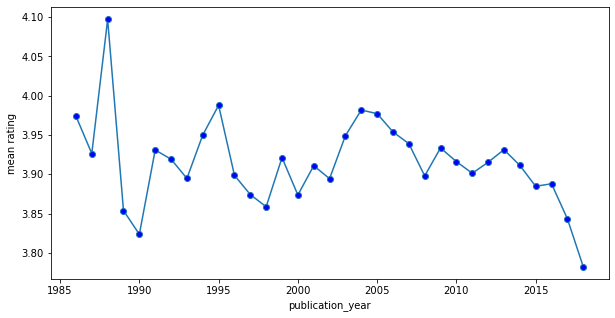

In [28]:
mean_rating_year['average_rating'].plot.line(style='-o', figsize=(10,5), markerfacecolor='blue', ylabel='mean rating')

__Error bar plot for average rating per publication year__

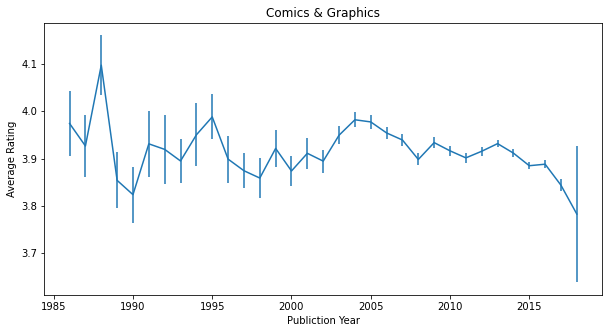

In [50]:
plt.figure(figsize=(10,5))
x = mean_rating_year.index
y = mean_rating_year['average_rating']
yerr = mean_rating_year['std_err']
plt.errorbar(x,y, yerr=yerr, fmt='')
plt.title("Comics & Graphics")
plt.ylabel("Average Rating")
plt.xlabel("Publiction Year")
plt.show()

__minimum rating count of 30__

In [31]:
count_rating_year = rating_year.groupby('publication_year').agg('count')

In [32]:
print("min count of rating : ", count_rating_year['average_rating'].min())
print("max count of rating : ", count_rating_year['average_rating'].max())

min count of rating :  34
max count of rating :  2874


In [33]:
count_rating_year.head()

,average_rating
publication_year,
1986,37
1987,45
1988,52
1989,57
1990,71


<AxesSubplot:xlabel='publication_year', ylabel='frequency'>

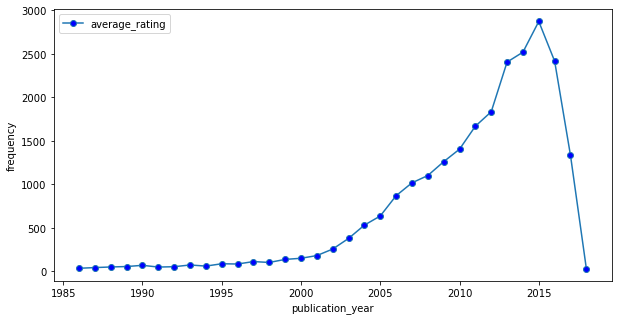

In [34]:
count_rating_year.plot.line(style='-o', figsize=(10,5), markerfacecolor='blue', ylabel='frequency')

__Error bars__ src: https://en.wikipedia.org/wiki/Error_bar
* are the graphical representations of the variability of data
* used on graphs to indicate the error or uncertainty in a reported measurement
* they give a general idea of how precise a measurement is or conversely how far from the reported value the true (error free) value might be


* Bar charts without error bars give the illusion that a measured or calculated value is known to high precision or high confidence.


__Error bars are graphical representations of the variability of data and used on graphs to indicate the error or uncertainty in a reported measurement. They give a general idea of how precise a measurement is, or conversely, how far from the reported value the true (error free) value might be.__

* The standard error is calculated by dividing the standard deviation by the square root of number of measurements that make up the mean (often represented by N). In this case, 5 measurements were made (N = 5) so the standard deviation is divided by the square root of 5.

In [35]:
mean_rating_year.head()

,average_rating,std,rating_count,std_err
publication_year,,,,
1986,3.974054,0.419507,37,0.068966
1987,3.926444,0.433465,45,0.064617
1988,4.097115,0.454033,52,0.062963
1989,3.853860,0.446421,57,0.059130
1990,3.823662,0.500894,71,0.059445


__Error bar for average rating per publication year__

In [36]:
#define labels, positions, bar heights and error bar heigts
labels = mean_rating_year.index.astype('str')
x_pos = np.arange(len(labels))
CTEs = mean_rating_year['average_rating'].values
error = mean_rating_year['std_err'].values

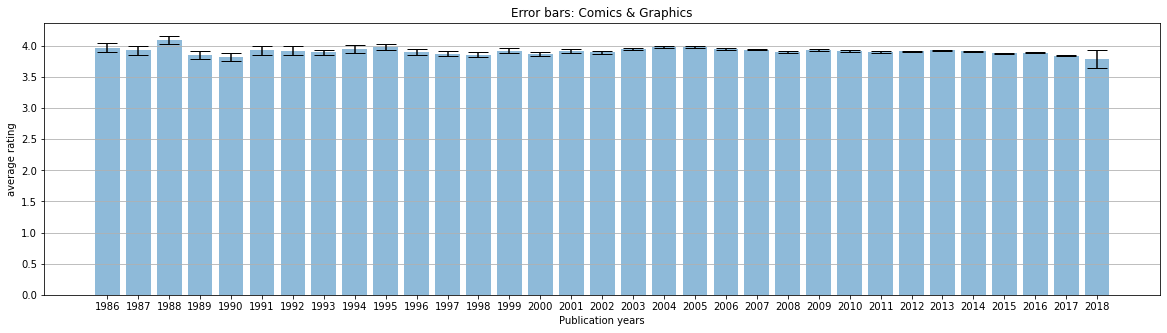

In [37]:
# Build the plot
fig, ax = plt.subplots(figsize=(20,5))
ax.bar(x_pos, CTEs,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
ax.set_ylabel('average rating')
ax.set_xlabel('Publication years')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Error bars: Comics & Graphics')
ax.yaxis.grid(True)

__Error bar for rating count per publication year__

# Mystery, thriller and crime

In [38]:
books_metadata_thriller = pd.read_json('books_metadata_thriller.json')

In [39]:
books_metadata_thriller.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66315 entries, 1 to 103407
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   text_reviews_count  66315 non-null  int64  
 1   language_code       66315 non-null  object 
 2   popular_shelves     66315 non-null  object 
 3   is_ebook            66315 non-null  object 
 4   average_rating      66315 non-null  float64
 5   description         66315 non-null  object 
 6   authors             66315 non-null  object 
 7   publication_year    66315 non-null  int64  
 8   book_id             66315 non-null  int64  
 9   ratings_count       66315 non-null  int64  
 10  work_id             66315 non-null  int64  
 11  title               66315 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 6.6+ MB


In [40]:
books_metadata_thriller.head()

,text_reviews_count,language_code,popular_shelves,is_ebook,average_rating,description,authors,publication_year,book_id,ratings_count,work_id,title
1,3,eng,"[{'count': '1694', 'name': 'mystery'}, {'count...",false,3.96,Agatha Christie's most ingenious murder myster...,"[{'author_id': '123715', 'role': ''}, {'author...",2013,16158998,5,2288775,A Murder is Announced
2,6,eng,"[{'count': '171', 'name': 'to-read'}, {'count'...",false,4.14,"""Poetic, down trodden and nihilistic, Jonathan...","[{'author_id': '4577517', 'role': ''}]",2014,22722787,18,42251489,The Cost of Doing Business
3,2,eng,"[{'count': '1642', 'name': 'mystery'}, {'count...",false,3.93,In Agatha Christie's classic mystery 4:50 From...,"[{'author_id': '123715', 'role': ''}, {'author...",2013,16158996,5,6490729,4:50 From Paddington
4,46,eng,"[{'count': '328', 'name': 'mystery'}, {'count'...",false,4.07,Past and present collide as Special Agent Pend...,"[{'author_id': '12577', 'role': ''}, {'author_...",2013,17368265,250,24152432,"White Fire (Pendergast, #13)"
5,4,eng,"[{'count': '5396', 'name': 'to-read'}, {'count...",false,4.11,1 MP3-CD / 10 hours\nHaunted by a series of ho...,"[{'author_id': '25108', 'role': ''}, {'author_...",2004,926660,15,911663,Monkeewrench


__list of unique publiation years__

In [41]:
books_metadata_thriller['publication_year'].unique()

array([2013, 2014, 2004, 2006, 2016, 2015, 2008, 1998, 1954, 2011, 1996,
       2012, 2010, 2002, 2000, 2003, 1991, 1960, 2017, 1997, 2007, 2005,
       1999, 1995, 1951, 1989, 2009, 2001, 1987, 1993, 1962, 1992, 1990,
       1986, 1981, 1978, 1988, 1964, 1946, 1979, 1966, 1976, 1994, 1973,
       1963, 1983, 1980, 1952, 1982, 1972, 1965, 1984, 1968, 1985, 1974,
       1958, 1967, 1969, 1975, 1955, 2018, 1971, 1961, 1957, 1956, 1977,
       1970, 1959, 1950, 1953])

__sort publication year__

In [42]:
rating_year_thriller = books_metadata_thriller[['average_rating','publication_year']].sort_values(by=['publication_year'])

In [43]:
rating_year_thriller.head()

,average_rating,publication_year
65997,3.50,1946
45330,3.85,1946
43483,3.78,1946
29487,3.92,1946
59541,3.19,1946


__groupby publication year and calculate mean, standard deviation and number of rating for each publication year__

In [44]:
mean_rating_thriller = rating_year_thriller.groupby('publication_year').agg('mean')
std_rating_thriller = rating_year_thriller.groupby('publication_year').agg(np.std)
count = rating_year_thriller.groupby('publication_year').agg('count')

__Final table ready for plot__

In [45]:
mean_rating_thriller['std'] = std_rating_thriller['average_rating']
mean_rating_thriller['rating_count']  = count['average_rating']
mean_rating_thriller['std_err'] = mean_rating_thriller['std']/np.sqrt(mean_rating_thriller['rating_count'])
mean_rating_thriller.head()

,average_rating,std,rating_count,std_err
publication_year,,,,
1946,3.670000,0.379317,33,0.066031
1950,3.666600,0.412927,50,0.058397
1951,3.706216,0.447719,37,0.073604
1952,3.697714,0.361891,35,0.061171
1953,3.749778,0.314422,45,0.046871


__keep rating count above 30__
* i.e. minimum number of rating must be 30 in each year

<AxesSubplot:xlabel='publication_year', ylabel='mean rating'>

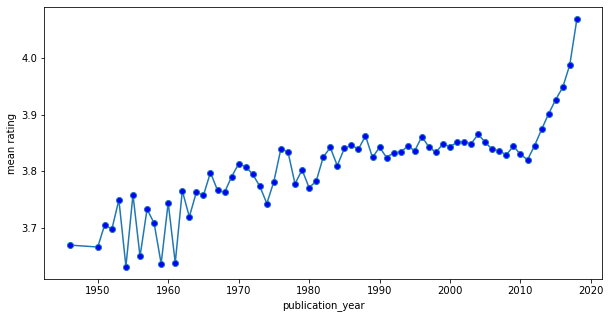

In [46]:
mean_rating_thriller[mean_rating_thriller['rating_count']>=30]['average_rating'].plot.line(style='-o', figsize=(10,5), markerfacecolor='blue', ylabel='mean rating')

__Error Bar__

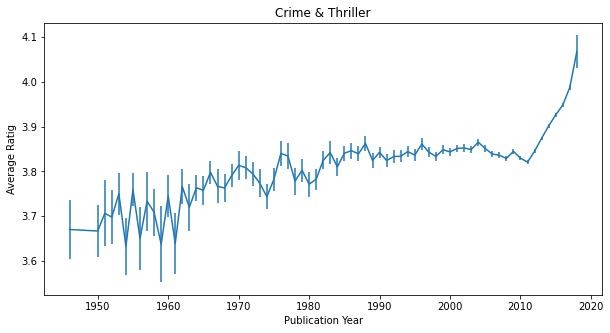

In [49]:
plt.figure(figsize=(10,5))
x = mean_rating_thriller.index
y = mean_rating_thriller['average_rating']
yerr = mean_rating_thriller['std_err']
plt.errorbar(x,y, yerr=yerr)
plt.title("Crime & Thriller")
plt.ylabel("Average Ratig")
plt.xlabel("Publication Year")
plt.show()

In [78]:
count_rating_thriller = rating_year_thriller.groupby('publication_year').agg('count')

In [91]:
count_rating_thriller.

,average_rating
publication_year,
1946,33
1950,50
1951,37
1952,35
1953,45
...,...
2014,6978
2015,6209
2016,5427


__Frequency distribution of books per year__

<AxesSubplot:xlabel='publication_year', ylabel='frequency'>

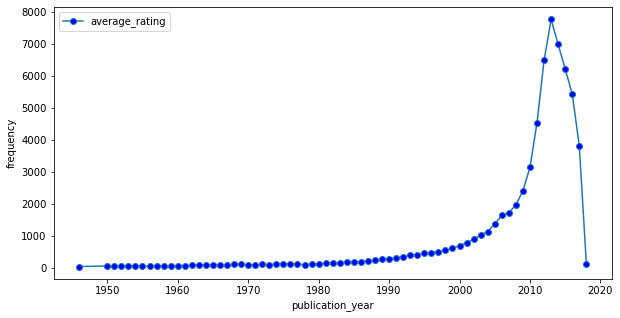

In [80]:
count_rating_thriller.plot.line(style='-o', figsize=(10,5), markerfacecolor='blue', ylabel='frequency')

__Error bar for average rating per publication year__

In [81]:
#define labels, positions, bar heights and error bar heigts
labels = mean_rating_thriller.index.astype('str')
x_pos = np.arange(len(labels))
CTEs = mean_rating_thriller['average_rating'].values
error = mean_rating_thriller['std_err'].values

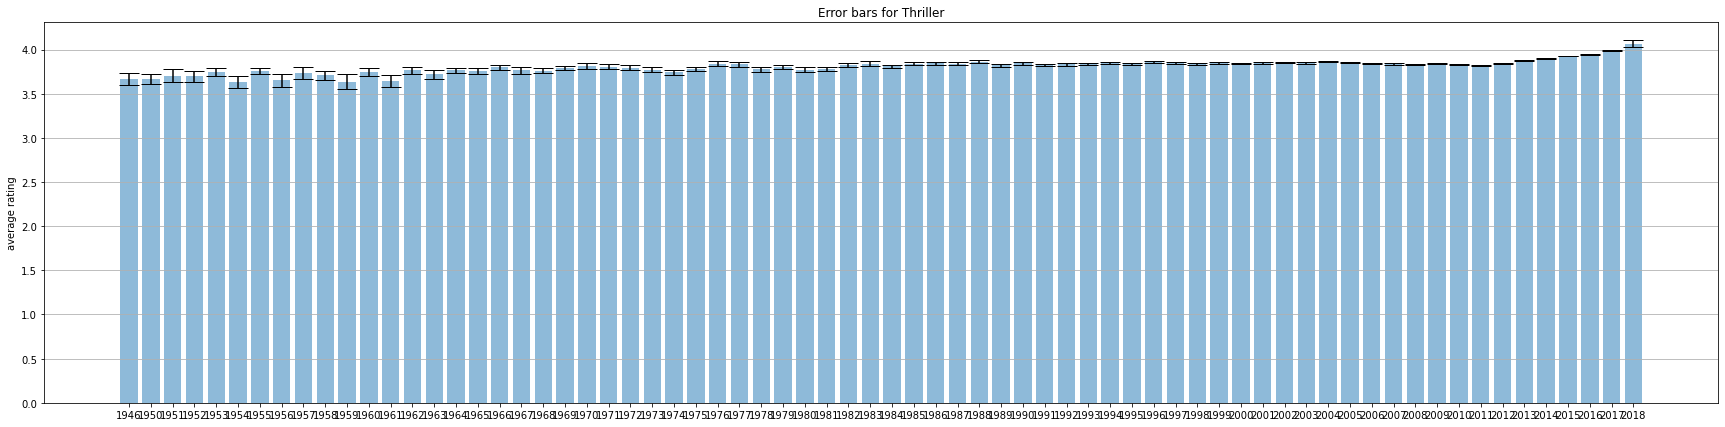

In [82]:
# Build the plot
fig, ax = plt.subplots(figsize=(30,7))
ax.bar(x_pos, CTEs,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
ax.set_ylabel('average rating')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Error bars for Thriller')
ax.yaxis.grid(True)